In [1]:
import numpy as np
import pandas as pd
import statistics as stat
import matplotlib.pyplot as plt
import seaborn as sns

# Read Dataset

In [2]:
data = pd.read_excel(r'C:\Users\hp\Downloads\iris.xls')

In [3]:
data.head()


,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Checking Basic Details of the Data

In [4]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Checking for Missing Values in the Dataset

In [5]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [6]:
from sklearn.impute import SimpleImputer

# Checking the Datatypes of the Columns in the Dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Taking the Numerical Columns in the Dataset Having Missing Values

In [8]:
num_cols=data[['SL','SW','PL']]

# Replacing the NaN values with the Mean Values

In [9]:
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
imputer = imputer.fit(num_cols)
num_cols=imputer.transform(num_cols)

In [10]:
num_cols=pd.DataFrame(num_cols,columns=[['SL','SW','PL']])

# Dropping the Columns with Missing Values from the Dataset

In [11]:
data.drop(['SL'],inplace=True,axis=1)
data.drop(['SW'],inplace=True,axis=1)
data.drop(['PL'],inplace=True,axis=1)

In [12]:
data.head()

,PW,Classification
0,0.2,Iris-setosa
1,0.2,Iris-setosa
2,0.2,Iris-setosa
3,0.2,Iris-setosa
4,0.2,Iris-setosa


# Adding the Numerical Columns to the Dataset after Filling the Missing Values with their Mean Values

In [13]:
data1=pd.concat([num_cols,data],axis=1)

In [14]:
data1.head()

,"(SL,)","(SW,)","(PL,)",PW,Classification
0,5.100000,3.5,1.4,0.2,Iris-setosa
1,4.900000,3.0,1.4,0.2,Iris-setosa
2,5.855944,3.2,1.3,0.2,Iris-setosa
3,4.600000,3.1,1.5,0.2,Iris-setosa
4,5.000000,3.6,1.4,0.2,Iris-setosa


In [15]:
data1.columns = data1.columns.map(''.join)

In [16]:
data1.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,Iris-setosa
1,4.900000,3.0,1.4,0.2,Iris-setosa
2,5.855944,3.2,1.3,0.2,Iris-setosa
3,4.600000,3.1,1.5,0.2,Iris-setosa
4,5.000000,3.6,1.4,0.2,Iris-setosa


# Checking for Missing Values

In [17]:
data1.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

# Checking for Outliers in SL

Text(0.5, 1.0, 'Outliers')

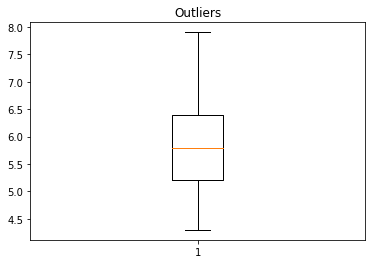

In [18]:
plt.boxplot(data1['SL'])
plt.title("Outliers")

# Checking for Outliers in SW

Text(0.5, 1.0, 'Outliers')

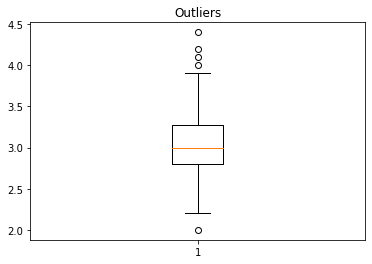

In [19]:
plt.boxplot(data1['SW'])
plt.title("Outliers")

In [20]:
Q1=np.percentile(data1['SW'],25,interpolation='midpoint')
Q2=np.percentile(data1['SW'],50,interpolation='midpoint')
Q3=np.percentile(data1['SW'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.25


In [21]:
data1['SW'].median()

3.0

In [22]:
IQR = Q3-Q1
IQR

0.4500000000000002

# Calculating the Upper & Lower Limits

In [23]:
low_limit=Q1-1.*IQR
upper_limit=Q3+1.5*IQR
low_limit


2.3499999999999996

# Finding out the Outliers in the SW Column

In [24]:
outliers=[]
for i in data1['SW']:
    if(i>upper_limit) or (i<low_limit):
        outliers.append(i)

In [25]:
outliers

[4.0, 4.4, 4.1, 4.2, 2.3, 2.3, 2.0, 2.2, 2.2, 2.3, 2.3, 2.2]

# Finding the Index values of the Outliers in the Dataset

In [26]:
ind=data1['SW']>upper_limit
a=data1.loc[ind].index
a

Int64Index([14, 15, 32, 33], dtype='int64')

# Dropping the Outliers from the Dataset

In [27]:
data1.drop([14, 15, 32, 33],inplace=True)

# Checking for Outliers in PL

Text(0.5, 1.0, 'Outliers')

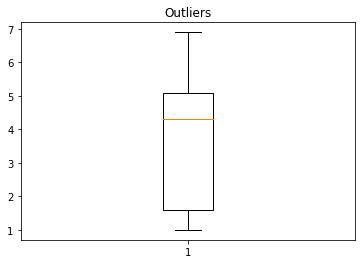

In [28]:
plt.boxplot(data1['PL'])
plt.title("Outliers")

# Checking for Outliers in PW

Text(0.5, 1.0, 'Outliers')

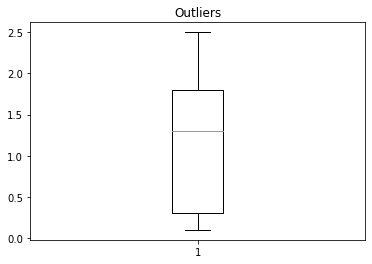

In [29]:
plt.boxplot(data1['PW'])
plt.title("Outliers")

# Correlation Matrix

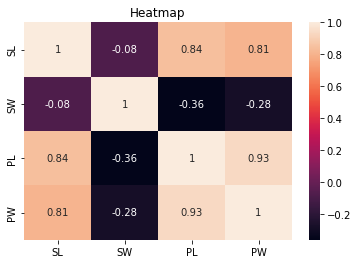

In [30]:
sns.heatmap(data1.corr(),annot=True)
plt.title("Heatmap")
plt.show()

# Converting the Classification Column to Numerical Format to Make it Machine Readable

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [32]:
data1['Classification'] = le.fit_transform(data1['Classification'])
data1.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,0
1,4.900000,3.0,1.4,0.2,0
2,5.855944,3.2,1.3,0.2,0
3,4.600000,3.1,1.5,0.2,0
4,5.000000,3.6,1.4,0.2,0


# Splitting the Data for Testing

In [33]:
from sklearn.model_selection import train_test_split
X = data1.drop(columns=['Classification'])
Y = data1['Classification']
x_train, x_test, y_train, y_test = train_test_split(X, Y , test_size = 0.30)

# Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [46]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [36]:
print("Accuracy : ",model.score(x_test,y_test)*100)

Accuracy :  93.18181818181817


Accuracy for Logistic Regression is 93.18%

# knn Model

In [37]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [38]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [39]:
print("Accuracy : ",model.score(x_test,y_test)*100)

Accuracy :  95.45454545454545


Accuracy for knn Model is 95.45%

# Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [41]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [42]:
print("Accuracy : ",model.score(x_test,y_test)*100)

Accuracy :  93.18181818181817


Accuracy for Decision Tree Model is 93.18%

# Random Forest Algorithm

In [43]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()


In [44]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [45]:
print("Accuracy : ",model.score(x_test,y_test)*100)

Accuracy :  93.18181818181817


Accuracy for Random Forest Algorithm -93.18%

Out of 4 Models knn model has lowest accuracy-93.18%. By further training after shuffling the training and testing sets these accuracies can be improved.